

# RAVDESS: Ryerson Audio-Visual Database of Emotional Speech and Song

---

The data contains around **~7,356 files** with a total size **24.8 GB**.

It has **24 professional actors** (12 female, 12 male) So it's a balanced data set
by Ryerson Audio Visual Database of emotional Speech and songs

Each actor vocalizes two lexically matched statements in a **neutral North American accent**.

---

## Key Highlights:

Balanced across gender (**12F, 12M**).
Includes both **speech** and **song** modalities.
High-quality recordings designed for research in emotion recognition.
Total size: **~24.8 GB**

---

## Speech Emotions:

- Neutral,
- Happy,
- Sad,
- Angry,
- Fearful,
- Surprise,
- and Disgust

---

## Songs Emotions:

- Neutral,
- Happy,
- Sad,
- Angry,
- Fearful emotions

---

## Access:
The dataset can be accessed using the Deep Lake API for direct streaming into ML pipelines

---

## Possible Use Cases:

- Call Center Analytics

- Mental Health Monitoring

- Music Emotion Recognition

---

## Goal:

- A mental health support tool that flags distress from speech tone.

---


In [1]:
!pip install deeplake<4 pandas tensorflow matplotlib scikit-learn seaborn

/bin/bash: line 1: 4: No such file or directory


Setting up the folder to download my data to the drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")
drive_path = '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData'

Mounted at /content/drive


Downloading + Unzipping the data from Zenodo

In [3]:
!wget -c https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip -O /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/Audio_Speech_Actors_01-24.zip

!unzip -q /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/Audio_Speech_Actors_01-24.zip -d /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped

!ls /content/drive/MyDrive/VoiceEmotionDetection/RavdessData


--2025-09-18 15:47:00--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.43.25, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1188976/files/Audio_Speech_Actors_01-24.zip [following]
--2025-09-18 15:47:02--  https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 416 REQUESTED_RANGE_NOT_SATISFIABLE

    The file is already fully retrieved; nothing to do.

replace /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_01/03-01-01-01-01-01-01.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
n
Audio_Speech_Actors_01-24.zip  FullDataUnzipped


In [4]:
data_path = '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped'

In [5]:
import glob # To extract data from

audio_files = glob.glob('/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_*/*.wav',  recursive=True)


In [6]:
audio_files

['/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-01-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-01-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-02-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-02-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-01-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-02-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-01-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-02-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-02-01-01-0

In [7]:
from os.path import basename
import os, glob
import pandas as pd

# Emotions according to the path name
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

data = []
for f in audio_files:
  basename = os.path.basename(f)
  parts = basename.split('-')

  emotion_id = parts[2]
  actor_id = parts[-1].split('.')[0] # Extract actor ID and remove extension

  data.append({
        "filename": f,
        "emotion_id": emotion_id,
        "emotion": emotion_map[emotion_id],
        "actor": int(actor_id)
  })

df = pd.DataFrame(data)

In [8]:
df

,filename,emotion_id,emotion,actor
0,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
1,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
2,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
3,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
4,/content/drive/MyDrive/VoiceEmotionDetection/R...,02,calm,8
...,...,...,...,...
1435,/content/drive/MyDrive/VoiceEmotionDetection/R...,08,surprised,7
1436,/content/drive/MyDrive/VoiceEmotionDetection/R...,08,surprised,7
1437,/content/drive/MyDrive/VoiceEmotionDetection/R...,08,surprised,7
1438,/content/drive/MyDrive/VoiceEmotionDetection/R...,08,surprised,7


In [20]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt

In [17]:
audio_path_0 = df.iloc[0]['filename']

y, sr = librosa.load(audio_path_0)

In [19]:
Audio(data=y, rate=sr) # Testing the path as well as the Aduio

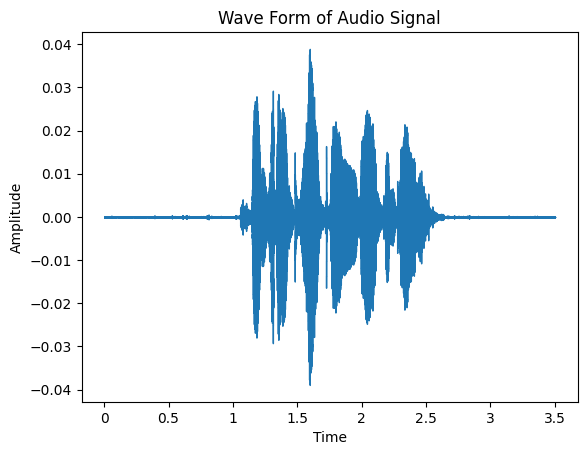

In [23]:
plt.Figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Wave Form of Audio Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [30]:
# import glob # To extract data from

# audio_files = glob.glob('/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_*/*.wav',  recursive=True)

# def resample_audio(audio_path, target_sr=16000):
#   y, sr = librosa.load(audio_path, sr=target_sr)
#   return y, sr

In [64]:
df.drop(columns=['resampled_audio', 'resampled_sr'], inplace=True)


In [66]:
def resample_audio(audio_path, target_sr=16000):
    y, sr = librosa.load(audio_path, sr=target_sr)
    return pd.Series({"resampled_audio": y, "resampled_sr": sr})

df[["resampled_audio", "resampled_sr"]] = df["filename"].apply(resample_audio)


In [67]:
def process_audio(y):
    # Ensure mono
    if y.ndim > 1:
        y = librosa.to_mono(y)
    # Remove silence
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    return y_trimmed

df['processed_audio'] = df['resampled_audio'].apply(process_audio)


In [68]:
audio_mono_silenced = df["processed_audio"].iloc[0]

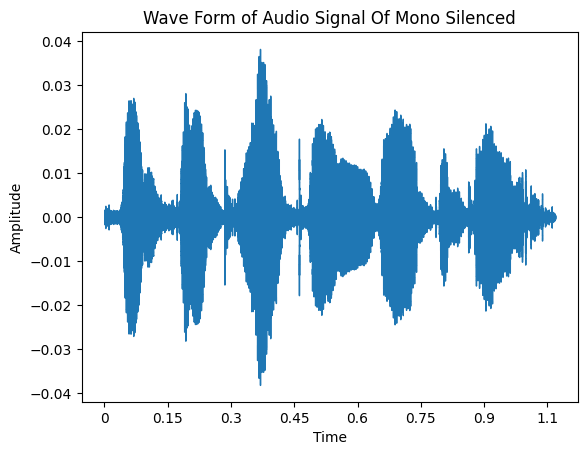

In [70]:

plt.Figure(figsize=(14, 5))
librosa.display.waveshow(audio_mono_silenced)
plt.title("Wave Form of Audio Signal Of Mono Silenced")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [71]:
Audio(data=audio_mono_silenced, rate=sr)

In [43]:
df["resampled_audio"]

,resampled_audio
0,"[-0.00010094681, -0.00016732774, -0.0001473378..."
1,"[7.141706e-05, 0.000113358255, 0.00010501302, ..."
2,"[-2.1902222e-05, -2.4937848e-05, -3.3964723e-0..."
3,"[0.00012642982, 0.0002068571, 0.00020267298, 0..."
4,"[-9.2040864e-10, 1.1526708e-09, -1.4078978e-09..."
...,...
1435,"[-2.4868996e-14, 1.4921397e-13, -7.460699e-14,..."
1436,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1437,"[4.5474735e-13, -5.684342e-13, -4.902745e-13, ..."
1438,"[-2.6466296e-10, 3.5994674e-10, -4.6442494e-10..."


In [44]:
def to_mono(y):
  if y.ndim == 1:
    return y
  else:
    librosa.to_mono(y)

In [45]:
df["resampled_audio"] = df['resampled_audio'].apply(to_mono)

In [48]:
audio_mono = df["resampled_audio"].iloc[0]

In [50]:
def silence_removal(y):
  return librosa.effects.trim(y)

In [59]:
def silence_removal(y):
  y_trimmed, _ = librosa.effects.trim(y)
  return y_trimmed

In [61]:
audio_mono_silenced = df["resampled_audio"].iloc[0]

plt.Figure(figsize=(14, 5))
librosa.display.waveshow()

ParameterError: Audio data must be of type numpy.ndarray